# Mineração de dados

## Exploratory Analysis

In [2]:
import numpy as np
import pandas as pd# Aprendizado de Comitês
import matplotlib.pyplot as plt
import sklearn

# df_adults = pd.read_csv('datasets/adult.csv')
df_diamonds = pd.read_csv('datasets/diamonds.csv')
df_diamonds[df_diamonds.duplicated()].info()
# df_cyber.drop_duplicates(keep=False, inplace=True)

ImportError: dlopen(/Users/disalles7/Documents/mestrado-materias/mineracao-dados/projeto-final/venv/lib/python3.8/site-packages/sklearn/__check_build/_check_build.cpython-38-darwin.so, 2): Symbol not found: ____chkstk_darwin
  Referenced from: /Users/disalles7/Documents/mestrado-materias/mineracao-dados/projeto-final/venv/lib/python3.8/site-packages/sklearn/__check_build/../.dylibs/libomp.dylib
  Expected in: /usr/lib/libSystem.B.dylib
 in /Users/disalles7/Documents/mestrado-materias/mineracao-dados/projeto-final/venv/lib/python3.8/site-packages/sklearn/__check_build/../.dylibs/libomp.dylib
___________________________________________________________________________
Contents of /Users/disalles7/Documents/mestrado-materias/mineracao-dados/projeto-final/venv/lib/python3.8/site-packages/sklearn/__check_build:
__init__.py               __pycache__               _check_build.cpython-38-darwin.so
setup.py
___________________________________________________________________________
It seems that scikit-learn has not been built correctly.

If you have installed scikit-learn from source, please do not forget
to build the package before using it: run `python setup.py install` or
`make` in the source directory.

If you have used an installer, please check that it is suited for your
Python version, your operating system and your platform.

### Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))

In [3]:
df_diamonds.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


* ***age***: continuous.
* ***workclass***: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* ***fnlwgt***: continuous.
* ***education***: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* ***education-num***: continuous.
* ***marital-status***: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* ***occupation***: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* ***relationship***: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* ***race***: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* ***sex***: Female, Male.
* ***capital-gain***: continuous.
* ***capital-loss***: continuous.
* ***hours-per-week***: continuous.
* ***native-country***: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
* ***class***: >50K, <=50K


### Exibi as 10 primeiras linhas do dataset


In [4]:
df_diamonds.head(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


###  Class Label | class: >50K, <=50K or workclass: > Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

In [5]:
df_diamonds.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
price           int64
x             float64
y             float64
z             float64
dtype: object

Attr: Carat
Max : 5.01
Min : 0.2
Variance: 0.22468665982277333
Std : 0.4740112444054184
mean : 0.7979397478680014
median : 0.7
mode: 0    0.3
dtype: float64
1 quartile 25%: 0.4
2 quartile 50%: 0.7
3 quartile 75%: 1.04

IQR: 0.64

Histogram = Positive skewed | prox normal
Box Plot


<AxesSubplot:xlabel='carat'>

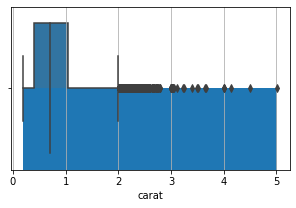

In [18]:
print('Attr: Carat')
df_attr = df_diamonds["carat"]
print(f'Max : {df_attr.max()}')
print(f'Min : {df_attr.min()}')
print(f'Variance: {df_attr.var()}')
print(f'Std : {df_attr.std()}')
print(f'mean : {df_attr.mean()}')
print(f'median : {df_attr.median()}')
print(f'mode: {df_attr.mode()}')
print(f'1 quartile 25%: {df_attr.quantile(q=0.25)}')
print(f'2 quartile 50%: {df_attr.quantile(q=0.50)}')
print(f'3 quartile 75%: {df_attr.quantile(q=0.75)}\n')
print(f'IQR: {df_attr.quantile(q=0.75)-df_attr.quantile(q=0.25)}\n')
print('Histogram = Positive skewed | prox normal')
df_attr.hist(figsize=(5,3))

Attr: Depth
Max : 79.0
Min : 43.0
Variance: 2.0524038431766978
Std : 1.432621318833661
mean : 61.749404894327036
median : 61.8
mode: 0    62.0
dtype: float64
1 quartile 25%: 61.0
2 quartile 50%: 61.8
3 quartile 75%: 62.5

Histogram = Positive skewed


<AxesSubplot:>

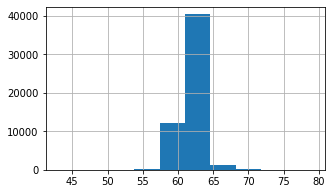

In [7]:
print('Attr: Depth')
df_attr = df_diamonds["depth"]
print(f'Max : {df_attr.max()}')
print(f'Min : {df_attr.min()}')
print(f'Variance: {df_attr.var()}')
print(f'Std : {df_attr.std()}')
print(f'mean : {df_attr.mean()}')
print(f'median : {df_attr.median()}')
print(f'mode: {df_attr.mode()}')
print(f'1 quartile 25%: {df_attr.quantile(q=0.25)}')
print(f'2 quartile 50%: {df_attr.quantile(q=0.50)}')
print(f'3 quartile 75%: {df_attr.quantile(q=0.75)}\n')
print('Histogram = Positive skewed')

df_attr.hist(figsize=(5,3))

Attr: Table
Max : 95.0
Min : 43.0
Variance: 4.9929480753375515
Std : 2.2344905628213225
mean : 57.45718390804598
median : 57.0
mode: 0    56.0
dtype: float64
1 quartile 25%: 56.0
2 quartile 50%: 57.0
3 quartile 75%: 59.0

Histogram = Positive skewed
Box Plot


<AxesSubplot:xlabel='carat'>

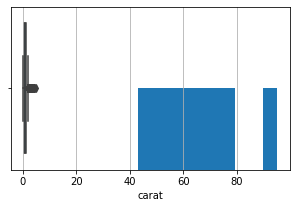

In [17]:
print('Attr: Table')
df_attr = df_diamonds["table"]
print(f'Max : {df_attr.max()}')
print(f'Min : {df_attr.min()}')
print(f'Variance: {df_attr.var()}')
print(f'Std : {df_attr.std()}')
print(f'mean : {df_attr.mean()}')
print(f'median : {df_attr.median()}')
print(f'mode: {df_attr.mode()}')
print(f'1 quartile 25%: {df_attr.quantile(q=0.25)}')
print(f'2 quartile 50%: {df_attr.quantile(q=0.50)}')
print(f'3 quartile 75%: {df_attr.quantile(q=0.75)}\n')
print('Histogram = Positive skewed')
df_attr.hist(figsize=(5,3))

Attr: Price
Max : 18823
Min : 326
Variance: 15915629.42430145
Std : 3989.439738146379
mean : 3932.799721913237
median : 2401.0
mode: 0    605
dtype: int64
1 quartile 25%: 950.0
2 quartile 50%: 2401.0
3 quartile 75%: 5324.25

Histogram = Negatively skewed


<AxesSubplot:>

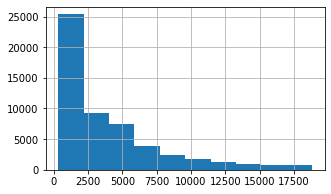

In [9]:
print('Attr: Price')
df_attr = df_diamonds["price"]
print(f'Max : {df_attr.max()}')
print(f'Min : {df_attr.min()}')
print(f'Variance: {df_attr.var()}')
print(f'Std : {df_attr.std()}')
print(f'mean : {df_attr.mean()}')
print(f'median : {df_attr.median()}')
print(f'mode: {df_attr.mode()}')
print(f'1 quartile 25%: {df_attr.quantile(q=0.25)}')
print(f'2 quartile 50%: {df_attr.quantile(q=0.50)}')
print(f'3 quartile 75%: {df_attr.quantile(q=0.75)}\n')
print('Histogram = Negatively skewed')
df_attr.hist(figsize=(5,3))

Attr: X
Max : 10.74
Min : 0.0
Variance: 1.258347173044451
Std : 1.1217607467924928
mean : 5.731157211716722
median : 5.7
mode: 0    4.37
dtype: float64
1 quartile 25%: 4.71
2 quartile 50%: 5.7
3 quartile 75%: 6.54

Histogram = Positive skewed


<AxesSubplot:>

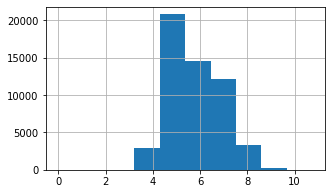

In [10]:
print('Attr: X')
df_attr = df_diamonds["x"]
print(f'Max : {df_attr.max()}')
print(f'Min : {df_attr.min()}')
print(f'Variance: {df_attr.var()}')
print(f'Std : {df_attr.std()}')
print(f'mean : {df_attr.mean()}')
print(f'median : {df_attr.median()}')
print(f'mode: {df_attr.mode()}')
print(f'1 quartile 25%: {df_attr.quantile(q=0.25)}')
print(f'2 quartile 50%: {df_attr.quantile(q=0.50)}')
print(f'3 quartile 75%: {df_attr.quantile(q=0.75)}\n')
print('Histogram = Positive skewed')
df_attr.hist(figsize=(5,3))

Attr: Y
Max : 58.9
Min : 0.0
Variance: 1.3044716138353198
Std : 1.1421346741235552
mean : 5.734525954764553
median : 5.71
mode: 0    4.34
dtype: float64
1 quartile 25%: 4.72
2 quartile 50%: 5.71
3 quartile 75%: 6.54

Histogram = Positive skewed


<AxesSubplot:>

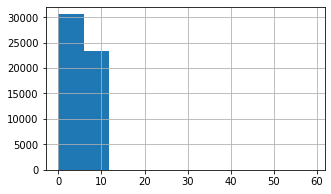

In [11]:
print('Attr: Y')
df_attr = df_diamonds["y"]
print(f'Max : {df_attr.max()}')
print(f'Min : {df_attr.min()}')
print(f'Variance: {df_attr.var()}')
print(f'Std : {df_attr.std()}')
print(f'mean : {df_attr.mean()}')
print(f'median : {df_attr.median()}')
print(f'mode: {df_attr.mode()}')
print(f'1 quartile 25%: {df_attr.quantile(q=0.25)}')
print(f'2 quartile 50%: {df_attr.quantile(q=0.50)}')
print(f'3 quartile 75%: {df_attr.quantile(q=0.75)}\n')
print('Histogram = Positive skewed')

df_attr.hist(figsize=(5,3))

Attr: Z
Max : 31.8
Min : 0.0
Variance: 0.4980108625865512
Std : 0.7056988469499941
mean : 3.5387337782721544
median : 3.53
mode: 0    2.7
dtype: float64
1 quartile 25%: 2.91
2 quartile 50%: 3.53
3 quartile 75%: 4.04

Histogram = Positive skewed


<AxesSubplot:>

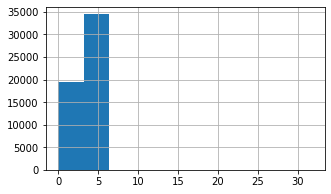

In [12]:
print('Attr: Z')
df_attr = df_diamonds["z"]
print(f'Max : {df_attr.max()}')
print(f'Min : {df_attr.min()}')
print(f'Variance: {df_attr.var()}')
print(f'Std : {df_attr.std()}')
print(f'mean : {df_attr.mean()}')
print(f'median : {df_attr.median()}')
print(f'mode: {df_attr.mode()}')
print(f'1 quartile 25%: {df_attr.quantile(q=0.25)}')
print(f'2 quartile 50%: {df_attr.quantile(q=0.50)}')
print(f'3 quartile 75%: {df_attr.quantile(q=0.75)}\n')
print('Histogram = Positive skewed')

df_attr.hist(figsize=(5,3))

from pandas.plotting import scatter_matrix

attributes = ["cut","carat","depth","table","price","x","y","z"]
scatter_matrix(df_diamonds[attributes], figsize=(12, 8))

## Boxplot

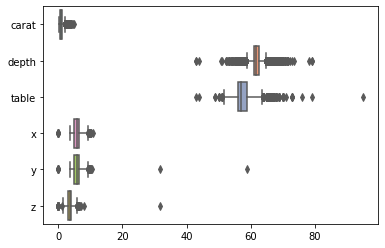

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt


usecols = ["carat","depth","table","x","y","z","cut"]
df_diamonds = pd.read_csv('datasets/diamonds.csv',usecols=usecols)
ax = sns.boxplot(data=df_diamonds, orient="h", palette="Set2")

<AxesSubplot:xlabel='carat'>

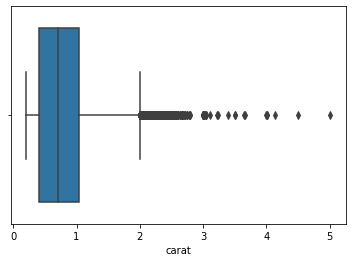

In [19]:
sns.boxplot(x=df_diamonds["carat"])

<AxesSubplot:xlabel='depth'>

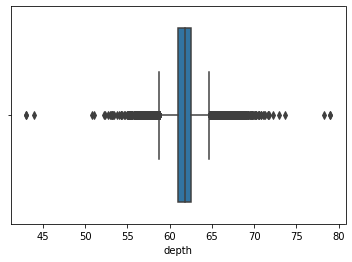

In [20]:
sns.boxplot(x=df_diamonds["depth"])

<AxesSubplot:xlabel='table'>

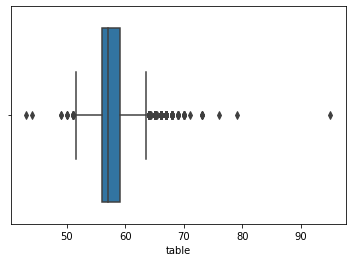

In [21]:
sns.boxplot(x=df_diamonds["table"])

<AxesSubplot:xlabel='x'>

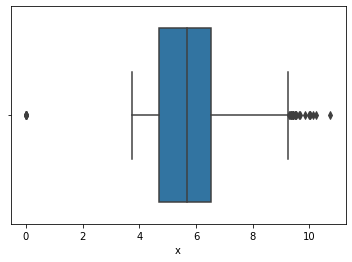

In [22]:
sns.boxplot(x=df_diamonds["x"])

<AxesSubplot:xlabel='y'>

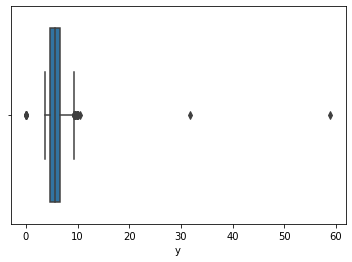

In [23]:
sns.boxplot(x=df_diamonds["y"])

<AxesSubplot:xlabel='z'>

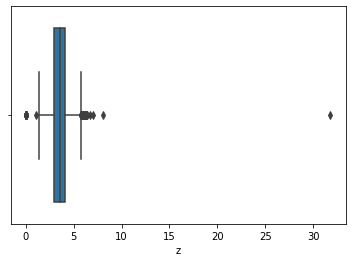

In [25]:
sns.boxplot(x=df_diamonds["z"])

In [2]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
print(scaler.fit_transform(df_diamonds))


ImportError: dlopen(/Users/disalles7/Documents/mestrado-materias/mineracao-dados/projeto-final/venv/lib/python3.8/site-packages/sklearn/__check_build/_check_build.cpython-38-darwin.so, 2): Symbol not found: ____chkstk_darwin
  Referenced from: /Users/disalles7/Documents/mestrado-materias/mineracao-dados/projeto-final/venv/lib/python3.8/site-packages/sklearn/__check_build/../.dylibs/libomp.dylib
  Expected in: /usr/lib/libSystem.B.dylib
 in /Users/disalles7/Documents/mestrado-materias/mineracao-dados/projeto-final/venv/lib/python3.8/site-packages/sklearn/__check_build/../.dylibs/libomp.dylib
___________________________________________________________________________
Contents of /Users/disalles7/Documents/mestrado-materias/mineracao-dados/projeto-final/venv/lib/python3.8/site-packages/sklearn/__check_build:
__init__.py               __pycache__               _check_build.cpython-38-darwin.so
setup.py
___________________________________________________________________________
It seems that scikit-learn has not been built correctly.

If you have installed scikit-learn from source, please do not forget
to build the package before using it: run `python setup.py install` or
`make` in the source directory.

If you have used an installer, please check that it is suited for your
Python version, your operating system and your platform.

In [ ]:
ax = sns.boxplot(x="price", y="carat", data=df_diamonds)

In [ ]:
ax = sns.swarmplot(x="price", y="carat", data=df_diamonds, color=".25")